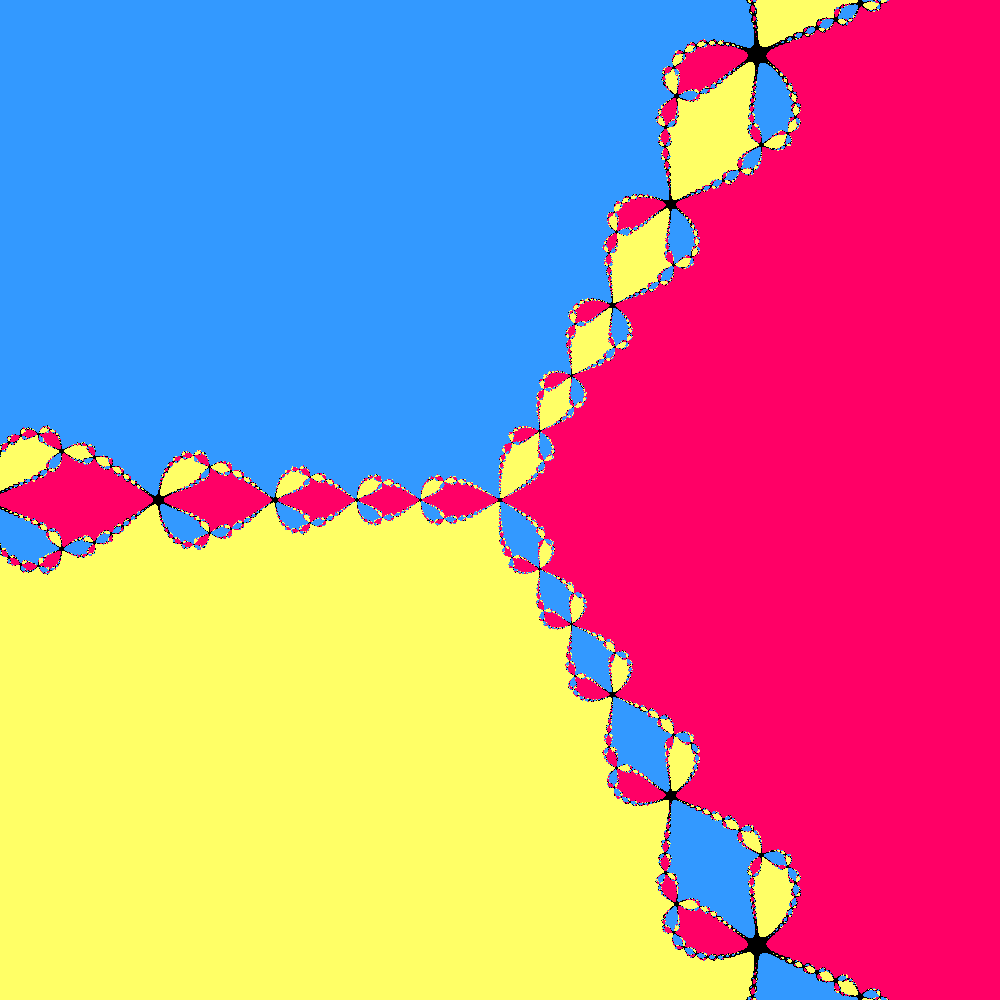

In [24]:
import numpy as np
import random as r
from PIL import Image
imgx = 1000
imgy = 1000
image = Image.new("RGB", (imgx, imgy))

x_min = -5.0
x_max = 5.0
y_min = -5.0
y_max = 5.0

max_iteration = 20
h = 1e-5
e = 1e-4

def f(z):
    return z*z*z - 1

f_roots = [complex(1,0),complex(-0.5,-0.86603),complex(-0.5,0.86603)]

def random_color():
    return (r.randint(1,255),r.randint(1,255),r.randint(1,255))

def pick_colors():
    colors = []
    for i in range(len(f_roots)):
        colors.append(random_color())
    colors.append((0,0,0))
    return colors

colors = [(255, 0, 102),(51, 153, 255),(255, 255, 102),(0,0,0)]

    
def derivative(f,z):
    return (f(z+complex(h,h))-f(z))/complex(h,h)

def NewtonFractal():
    for y in range(imgy):
        z_i = y * (y_max-y_min)/(imgy-1) + y_min
        for x in range(imgx):
            z_r = x * (x_max-x_min)/(imgx-1) + x_min
            z = complex(z_r,z_i)
            for i in range(max_iteration):
                find = False
                root_num = len(f_roots)
                dz = derivative(f,z)
                z_n = z - f(z)/dz
                for j in range(len(f_roots)):
                    if abs(z_n-f_roots[j])<e:
                        find = True
                        root_num = j
                        break;
                if find==True:
                    break
                z=z_n
            image.putpixel((x,y), colors[root_num])
 
NewtonFractal()
image

In [25]:
image.save("fractaltest3.eps","eps")